<a href="https://colab.research.google.com/github/machiwao/ml-development/blob/main/UCI_Wine_Quality_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality
Dataset Reference: https://archive.ics.uci.edu/dataset/186/wine+quality


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import shapiro, kstest, normaltest
from sklearn.preprocessing import LabelEncoder


## Data Preprocessing

In [42]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
reg_df = pd.concat([red_wine, white_wine], axis=0)

red_wine['wine_type'] = 0
white_wine['wine_type'] = 1
class_df = pd.concat([red_wine, white_wine], axis=0)

class_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [43]:
class_df['wine_type'].value_counts()

,count
wine_type,
1,4898
0,1599


In [44]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [45]:
class_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [46]:
class_df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [47]:
class_df.duplicated().sum()

1177

In [48]:
class_df.drop_duplicates(inplace=True)
class_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [49]:
class_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5320 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         5320 non-null   float64
 1   volatile acidity      5320 non-null   float64
 2   citric acid           5320 non-null   float64
 3   residual sugar        5320 non-null   float64
 4   chlorides             5320 non-null   float64
 5   free sulfur dioxide   5320 non-null   float64
 6   total sulfur dioxide  5320 non-null   float64
 7   density               5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulphates             5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  quality               5320 non-null   int64  
 12  wine_type             5320 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 581.9 KB


In [50]:
class_df.duplicated().sum()

0

In [51]:
class_df['wine_type'].value_counts()

,count
wine_type,
1,3961
0,1359


## Exploratory Data Analysis

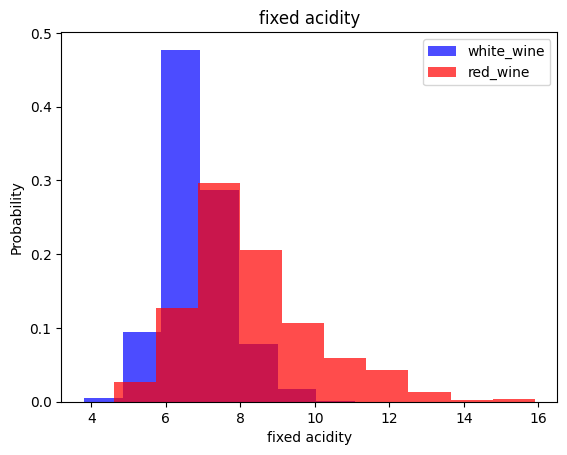

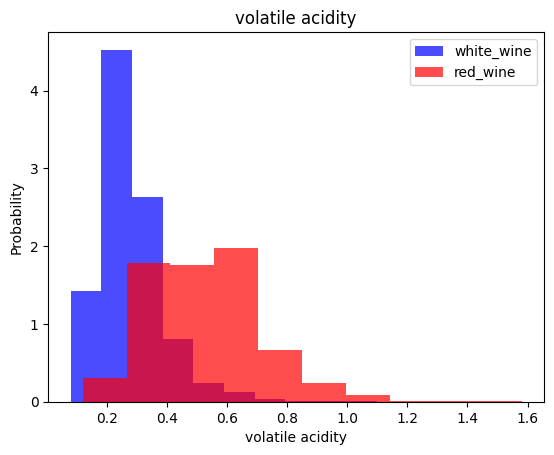

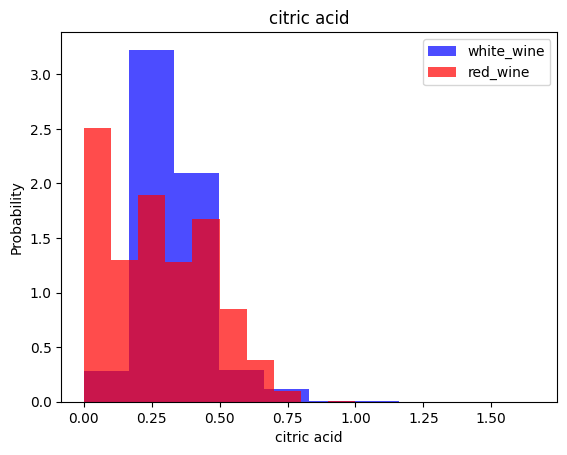

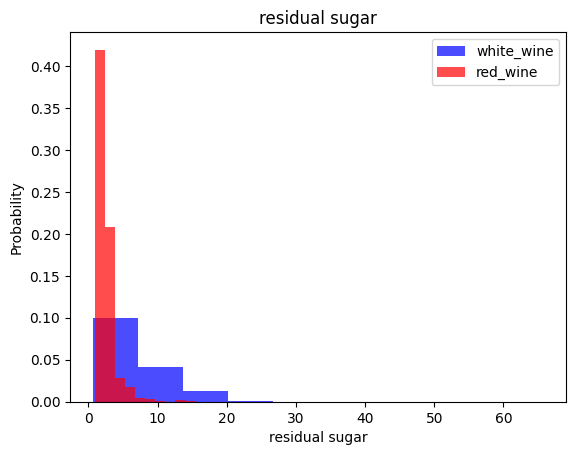

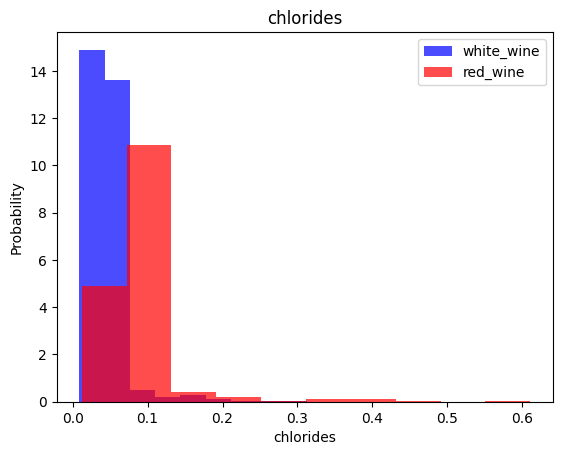

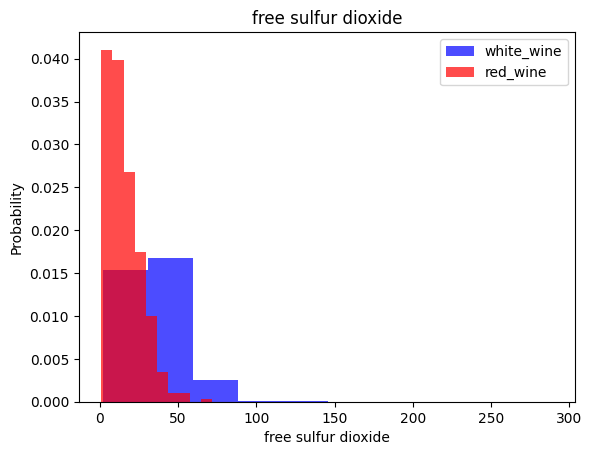

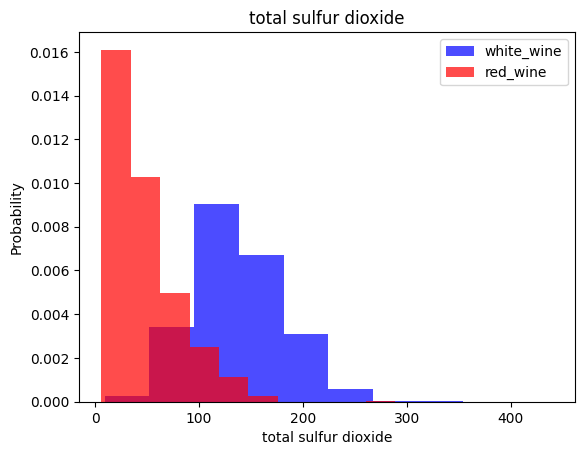

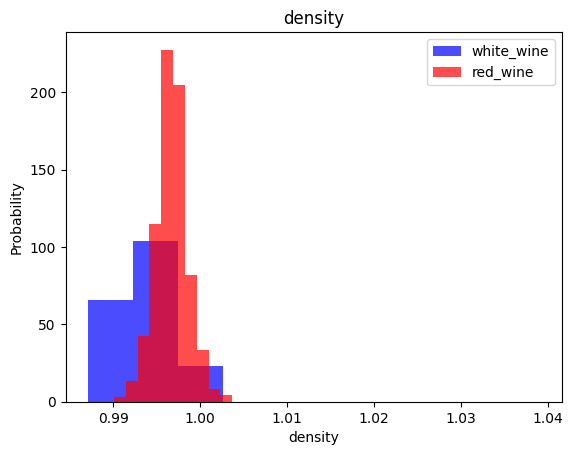

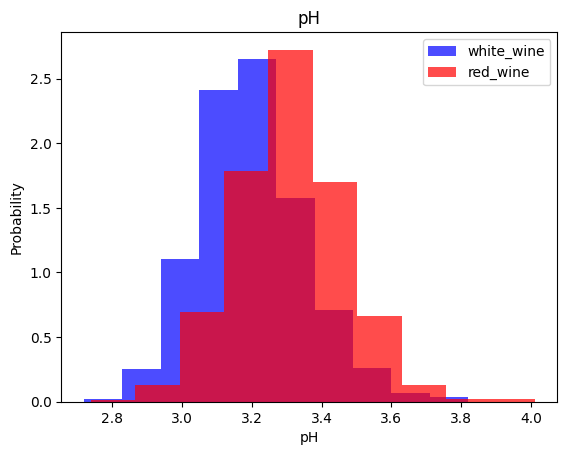

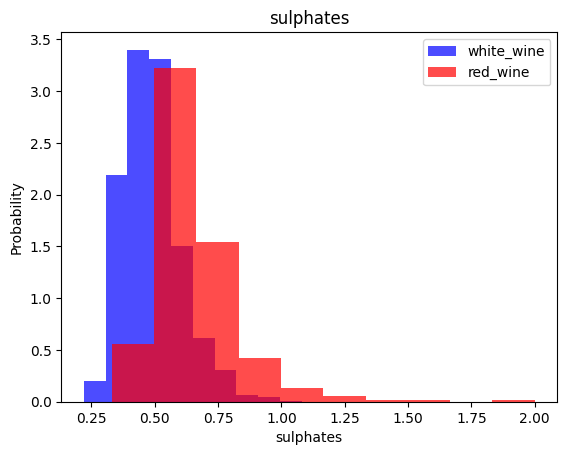

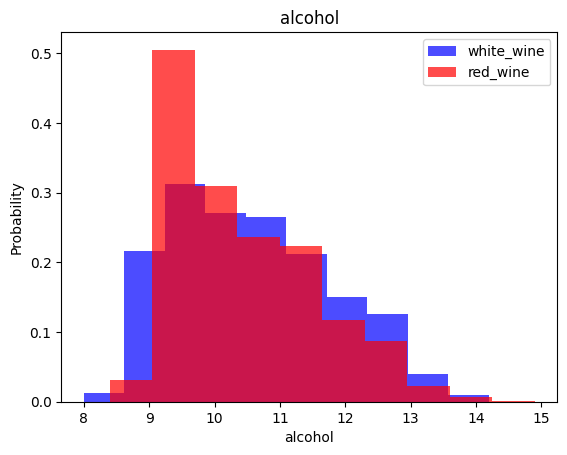

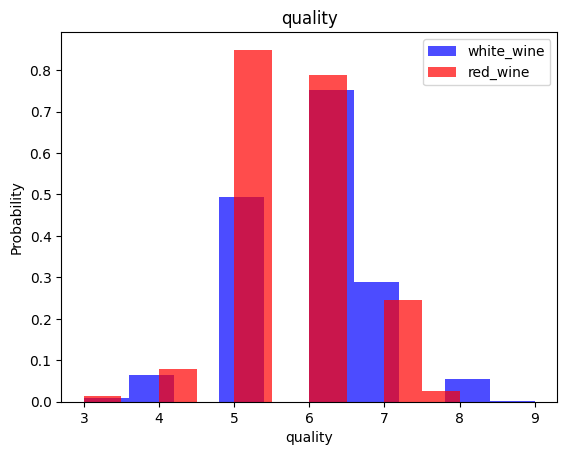

In [52]:
for label in class_df.columns[:-1]:
  plt.hist(class_df[class_df["wine_type"] == 1][label], color = "blue", label = 'white_wine', alpha = 0.7, density =True)
  plt.hist(class_df[class_df["wine_type"] == 0][label], color = "red", label = 'red_wine', alpha = 0.7, density =True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Data Preparation

In [53]:
train_df, test_df = train_test_split(class_df, test_size=0.2, random_state=42)

In [54]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
1504,7.0,0.170,0.74,12.80,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,1
589,10.2,0.290,0.49,2.60,0.059,5.0,13.0,0.99760,3.05,0.74,10.5,7,0
67,6.6,0.705,0.07,1.60,0.076,6.0,15.0,0.99620,3.44,0.58,10.7,5,0
2125,6.0,0.280,0.22,12.15,0.048,42.0,163.0,0.99570,3.20,0.46,10.1,5,1
3514,7.7,0.380,0.23,10.80,0.030,28.0,95.0,0.99164,2.93,0.41,13.6,6,1


In [56]:
scaler = StandardScaler()
train_df.iloc[:, :-1] = scaler.fit_transform(train_df.iloc[:, :-1])
test_df.iloc[:, :-1] = scaler.transform(test_df.iloc[:, :-1])

In [57]:
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
1504,-0.152857,-1.037623,2.860988,1.708471,-0.324359,-0.344816,0.197466,-0.104772,0.218070,-1.043809,1.383740,2.503705,1
589,2.270226,-0.319836,1.167512,-0.544818,0.094029,-1.395783,-1.789437,1.030575,-1.078428,1.454562,-0.044544,1.370836,0
67,-0.455743,2.162510,-1.677528,-0.765729,0.602072,-1.340468,-1.754271,0.563079,1.329355,0.344175,0.123490,-0.894903,0
2125,-0.910071,-0.379652,-0.661443,1.564879,-0.234704,0.650837,0.848045,0.396117,-0.152358,-0.488615,-0.380610,-0.894903,1
3514,0.377192,0.218504,-0.593704,1.266650,-0.772632,-0.123560,-0.347613,-0.959622,-1.819285,-0.835611,2.559973,0.237966,1


In [55]:
train_df['wine_type'].value_counts()

,count
wine_type,
1,3186
0,1070


In [65]:
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(train_df.iloc[:, :-1], train_df.iloc[:, -1])

In [66]:
y_train_resampled.value_counts()

,count
wine_type,
1,3186
0,3186


In [68]:
X_test = test_df.drop('wine_type', axis=1)
y_test = test_df['wine_type']

print(X_test.shape)
print(y_test.shape)

(1064, 12)
(1064,)


## Model Training

In [67]:
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [73]:
y_pred = model.predict(X_test)

## Model Testing and Metrics

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       289
           1       1.00      0.99      1.00       775

    accuracy                           0.99      1064
   macro avg       0.99      1.00      0.99      1064
weighted avg       0.99      0.99      0.99      1064

